In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Find proper DFT calculation options

### Objective : 

By re-optimizing the reference QM9 molecules which lie in equilibrium states, check the calculation option is consistent with the reference one.

### Experiment and Results :

1. re-optimize randomly selected 1K samples from 10K test dataset
2. Check the reference structure is equilibrium with respect to the DFT calculation option.
    - Check structural difference (DMAE, RMSD)
    - Check energy difference

### Conclusion :

The DFT calculation option we used is quite exact except for some execptional cases.

```B3LYP/6-31G(2df,p) opt(calcfc, maxstep=5, maxcycles=1000) integral(grid=ultrafine) scf(maxcycle=200, verytight) freq```

We considered the two state is indistinguishible if energy gap and DMAE are less than 0.1 kcal/mol and 0.01 $\AA$ respectively.

Under the criteria, the results show consistency over 99% of the testing samples.

In [2]:
data = pd.read_csv("/home/share/DATA/QM9M/MMFFtoDFT_input/results/DFT_reopt/reopt_results.csv")
data

,Unnamed: 0,idx,rmsd,dmae,energy_diff,abs_energy_diff
0,0,867,4.486634e-07,3.052261e-07,0.000000,0.000000
1,1,868,1.921577e-03,6.753392e-04,0.000011,0.000011
2,2,89,5.784568e-03,2.068238e-03,0.000022,0.000022
3,3,910,8.040796e-03,2.688415e-03,0.000045,0.000045
4,4,929,1.012451e-03,4.113433e-04,0.000008,0.000008
...,...,...,...,...,...,...
995,995,14212,6.035337e-03,2.020711e-03,0.000024,0.000024
996,996,1031,3.439910e-03,8.642324e-04,0.000012,0.000012
997,997,106,3.863926e-03,1.666320e-03,0.000023,0.000023
998,998,1064,1.085112e-03,2.459349e-04,0.000003,0.000003


### Energy difference

energy difference statistics (kcal/mol)
max: 	3.3967
mean: 	0.0039
Q1: 	0.0001
Q2: 	0.0002
Q3: 	0.0005


/home/ksh/.conda/envs/tsdiff/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in log10
/home/ksh/.conda/envs/tsdiff/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in log10


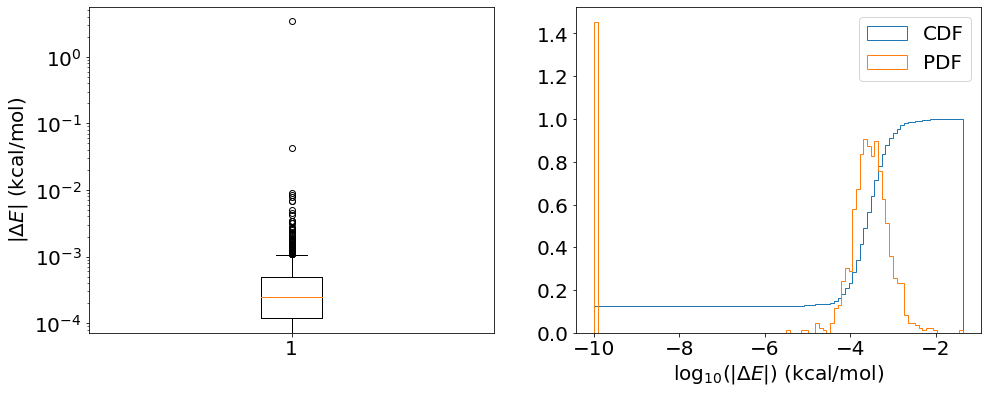

In [3]:
energy_diff = data["energy_diff"].to_numpy()
eVtokcalmol = 23.0609
# draw box plot
# remove outliers (energy gap over than 0.1)
# y-axis scale should be log scale

energy_diff = energy_diff * eVtokcalmol

fig = plt.figure(figsize=(16, 6))
# fontsize = 20
plt.rcParams.update({'font.size': 20})
axes = fig.subplots(1, 2)
ax = axes[0]
ax.boxplot(energy_diff)
ax.set_yscale("log")
ax.set_ylabel("$\\vert \\Delta E \\vert$ (kcal/mol)")

# print first quartile, median, third quartile
print("energy difference statistics (kcal/mol)")
print(f"max: \t{pd.Series(energy_diff).max():.4f}")
print(f"mean: \t{pd.Series(energy_diff).mean():.4f}")
print(f"Q1: \t{pd.Series(energy_diff).quantile(0.25):.4f}")
print(f"Q2: \t{pd.Series(energy_diff).quantile(0.5):.4f}")
print(f"Q3: \t{pd.Series(energy_diff).quantile(0.75):.4f}")

# plot cumulative distribution of energy_diff
ax = axes[1]

# exclude outliers
energy_diff = energy_diff[energy_diff < 0.1]
ax.hist(np.log10(energy_diff + 1e-10), bins=100, cumulative=True, histtype="step", density=True, label="CDF")
ax.hist(np.log10(energy_diff + 1e-10), bins=100, cumulative=False, histtype="step", density=True, label="PDF")
# ax.set_xscale("log")
ax.set_xlabel("$\\log_{10} (\\vert \\Delta E \\vert)$ (kcal/mol)")
ax.legend()

### Structural difference

DMAE difference statistics (Angstrom)
max: 	0.1072
mean: 	0.0014
Q1: 	0.0004
Q2: 	0.0007
Q3: 	0.0013


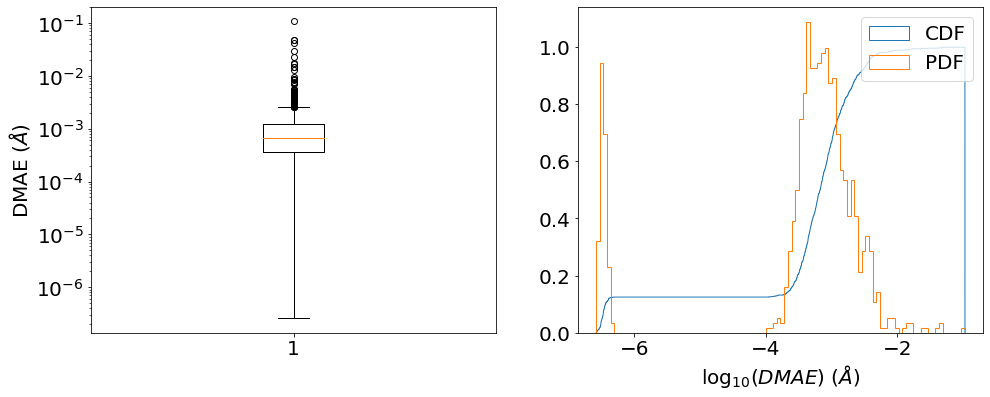

In [4]:
dmae = data["dmae"].to_numpy()

fig = plt.figure(figsize=(16, 6))
# fontsize = 20
plt.rcParams.update({'font.size': 20})

axes = fig.subplots(1, 2)
ax = axes[0]
ax.boxplot(dmae)
ax.set_yscale("log")
ax.set_ylabel("DMAE ($\\AA$)")

# print first quartile, median, third quartile
print("DMAE difference statistics (Angstrom)")
print(f"max: \t{pd.Series(dmae).max():.4f}")
print(f"mean: \t{pd.Series(dmae).mean():.4f}")
print(f"Q1: \t{pd.Series(dmae).quantile(0.25):.4f}")
print(f"Q2: \t{pd.Series(dmae).quantile(0.5):.4f}")
print(f"Q3: \t{pd.Series(dmae).quantile(0.75):.4f}")

# plot cumulative distribution of dmae
ax = axes[1]
_ = ax.hist(np.log10(dmae), bins=10000, cumulative=True, density=True, histtype="step", label="CDF")
_ = ax.hist(np.log10(dmae), bins=100, cumulative=False, density=True, histtype="step", label="PDF")
ax.set_xlabel("$\\log_{10} (DMAE)$ ($\\AA$)")
ax.legend()

## Check the cases optimization leads increasing energy

There were only 3 cases, and the increments were trivial.

Also, the iteration of optimiztion is 2, which means that the given geometry is already equilibrium geometry.

In [5]:
print(data["idx"][data.energy_diff < 0])
print(data["energy_diff"][data.energy_diff < 0])
print(data["energy_diff"][data.energy_diff < 0])
print(data["energy_diff"][data.energy_diff < 0])

384     7019
530      167
831    11955
Name: idx, dtype: int64
384   -0.000012
530   -0.000003
831   -0.000007
Name: energy_diff, dtype: float64
384   -0.000012
530   -0.000003
831   -0.000007
Name: energy_diff, dtype: float64
384   -0.000012
530   -0.000003
831   -0.000007
Name: energy_diff, dtype: float64


# Compare unrestricted DFT calculation

### Experiments and Results :

For some exceptional cases where the re-optimized structure is not consistent, we do optimize it with different option : using the unrestricted SCF calculation.

### Conclusion : 

The results saying that unrestricted option does not affect in energy difference and optimization results

In [6]:
def get_mask(data, key, thresh):
    mask = data[key] > thresh
    return mask

dmae_mask = get_mask(data, "dmae", 0.01)
rmsd_mask = get_mask(data, "rmsd", 0.01)
mask = dmae_mask | rmsd_mask

len(data[mask]["idx"].tolist())

89

In [8]:
unrest_data = pd.read_csv("/home/share/DATA/QM9M/MMFFtoDFT_input/results/DFT_reopt/reopt_unrestricted_results.csv")

# gather indexes of the data except for the data with energy_diff is nan
check_index = unrest_data["energy_diff"].notnull()
check_index = unrest_data[check_index]["idx"].tolist()

unrest_data = unrest_data[unrest_data["idx"].isin(check_index)]
unrest_data = unrest_data.sort_values("idx")

In [9]:
# gather the raw data with the indexes
raw_data = data
raw_data = raw_data[raw_data["idx"].isin(check_index)]

# sort the data by idx
raw_data = raw_data.sort_values("idx")

In [10]:
for K in ["energy_diff", "dmae", "rmsd"]:
    print(K)
    print(raw_data[K].to_numpy() - unrest_data[K].to_numpy())

energy_diff
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.72111720e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  6.61236645e-05  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e